In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("coffees.csv")
df

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
...,...,...,...
666,2013-03-12 08:28:00,18235.0,Sergio
667,2013-04-05 11:20:00,18942.0,Sergio
668,2013-04-27 11:04:00,19698.0,Sergio
669,2013-09-12 15:38:00,24450.0,Quentin


In [3]:
df.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-05-09 12:54:00,12358.0,Quentin
freq,1,2,367


In [4]:
df.columns

Index(['timestamp', 'coffees', 'contributor'], dtype='object')

In [5]:
df.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

In [6]:
df["timestamp"]= pd.to_datetime(df["timestamp"])
df.dtypes

timestamp      datetime64[ns]
coffees                object
contributor            object
dtype: object

In [7]:
df["coffees"]= pd.to_numeric(df["coffees"], errors='coerce')
df.dtypes


timestamp      datetime64[ns]
coffees               float64
contributor            object
dtype: object

In [8]:
df=df.dropna()
df.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


<AxesSubplot:>

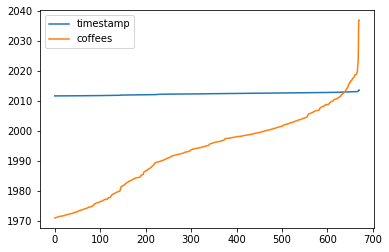

In [9]:
df.plot()

In [10]:
df.dtypes

timestamp      datetime64[ns]
coffees               float64
contributor            object
dtype: object

In [11]:
weekdays = df.timestamp.dt.weekday
df = df.assign(weekdays=weekdays)
df

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397.0,Quentin,0
1,2011-10-04 11:48:00,410.0,Quentin,1
4,2011-10-05 10:47:00,464.0,Quentin,2
5,2011-10-05 13:15:00,481.0,Quentin,2
6,2011-10-06 07:21:00,503.0,Anthony,3
...,...,...,...,...
666,2013-03-12 08:28:00,18235.0,Sergio,1
667,2013-04-05 11:20:00,18942.0,Sergio,4
668,2013-04-27 11:04:00,19698.0,Sergio,5
669,2013-09-12 15:38:00,24450.0,Quentin,3


In [12]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_names[key] for key in range(7)}
df.weekdays = df.weekdays.apply(lambda x: weekday_dict[x])
df.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397.0,Quentin,Monday
1,2011-10-04 11:48:00,410.0,Quentin,Tuesday
4,2011-10-05 10:47:00,464.0,Quentin,Wednesday
5,2011-10-05 13:15:00,481.0,Quentin,Wednesday
6,2011-10-06 07:21:00,503.0,Anthony,Thursday


In [13]:
df.head(20)

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397.0,Quentin,Monday
1,2011-10-04 11:48:00,410.0,Quentin,Tuesday
4,2011-10-05 10:47:00,464.0,Quentin,Wednesday
5,2011-10-05 13:15:00,481.0,Quentin,Wednesday
6,2011-10-06 07:21:00,503.0,Anthony,Thursday
7,2011-10-06 10:04:00,513.0,Quentin,Thursday
8,2011-10-06 12:14:00,539.0,Mike,Thursday
9,2011-10-06 12:49:00,540.0,Quentin,Thursday
10,2011-10-06 14:52:00,563.0,Ben,Thursday
11,2011-10-07 07:34:00,581.0,Anthony,Friday


In [14]:
group = df.groupby('weekdays').count()
group

,timestamp,coffees,contributor
weekdays,,,
Friday,117,117,117
Monday,148,148,148
Saturday,30,30,30
Sunday,13,13,13
Thursday,118,118,118
Tuesday,100,100,100
Wednesday,131,131,131


In [15]:
group = group.loc[weekday_names]
group

,timestamp,coffees,contributor
weekdays,,,
Monday,148,148,148
Tuesday,100,100,100
Wednesday,131,131,131
Thursday,118,118,118
Friday,117,117,117
Saturday,30,30,30
Sunday,13,13,13


<AxesSubplot:xlabel='weekdays'>

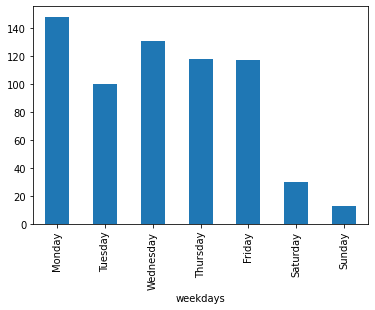

In [16]:
group.timestamp.plot(kind = 'bar')

In [17]:
fname = 'coffees.csv'
csv = np.genfromtxt(fname, dtype=float, delimiter=",")
coffees = csv[:,-2]
print(coffees)
Sin_Val = np.sin(coffees)
print(Sin_Val)

[   nan   397.   410.    nan    nan   464.   481.   503.   513.   539.
   540.   563.   581.   587.   605.   616.    nan   626.   635.   650.
   656.   673.   694.   699.   713.   770.   790.   799.   805.   818.
   819.   837.   866.   880.   889.   916.   920.   923.   924.   933.
   939.   974.  1011.  1036.  1050.  1065.  1070.  1091.  1095.  1133.
  1136.  1179.  1193.  1247.  1267.  1286.  1297.  1310.  1346.  1350.
  1352.  1389.  1409.  1413.  1457.  1473.  1477.  1481.  1510.  1529.
  1551.  1569.  1582.    nan  1640.  1706.  1707.  1726.  1735.  1749.
  1756.  1763.  1796.  1798.  1834.  1884.  1973.  1985.  2090.  2105.
  2145.  2162.  2201.  2237.  2240.  2264.    nan  2276.  2286.  2325.
  2364.  2376.  2412.  2417.  2428.  2436.  2472.  2522.  2545.  2589.
  2612.  2625.  2638.  2645.  2651.  2652.  2670.  2765.  2768.  2794.
  2873.  2886.  2895.  2900.  2944.  3083.  3128.  3213.  3260.  3292.
  3302.  3318.  3364.  3379.  3408.  3467.  3493.  3527.  3530.  3556.
  3583

In [18]:
cof = coffees[0:50]
print(cof)
Sin = Sin_Val[0:50]
print(Sin)

[  nan  397.  410.   nan   nan  464.  481.  503.  513.  539.  540.  563.
  581.  587.  605.  616.   nan  626.  635.  650.  656.  673.  694.  699.
  713.  770.  790.  799.  805.  818.  819.  837.  866.  880.  889.  916.
  920.  923.  924.  933.  939.  974. 1011. 1036. 1050. 1065. 1070. 1091.
 1095. 1133.]
[            nan  9.16533605e-01  9.99754506e-01             nan
             nan -8.16725213e-01 -3.30019281e-01  3.38361761e-01
 -7.95842349e-01 -9.76577898e-01 -3.46592904e-01 -6.09091838e-01
  1.93414242e-01  4.59849955e-01  9.70520755e-01  2.45310432e-01
             nan -7.33231316e-01  3.87837206e-01  3.04753201e-01
  5.58739050e-01  6.43584278e-01  2.87845580e-01  9.99990472e-01
  1.41060322e-01 -3.04868040e-01 -9.93895307e-01  8.60100162e-01
  6.83305735e-01  9.26841143e-01  8.16707818e-01  9.72644074e-01
 -8.81756182e-01  3.46706005e-01  7.06620294e-02 -9.74628411e-01
  4.67665230e-01 -5.87721844e-01  3.63255622e-01  5.29932814e-02
  3.29905457e-01  1.06077435e-01 -5.58714050

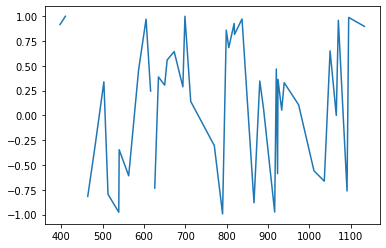

In [19]:
plt.plot(cof, Sin)
plt.show()

In [20]:
df=pd.DataFrame(df,columns=["timestamp","coffees", "contributor","sines"])
df["sines"] = pd.DataFrame(Sin_Val)
df

,timestamp,coffees,contributor,sines
0,2011-10-03 08:22:00,397.0,Quentin,NaN
1,2011-10-04 11:48:00,410.0,Quentin,0.916534
4,2011-10-05 10:47:00,464.0,Quentin,NaN
5,2011-10-05 13:15:00,481.0,Quentin,-0.816725
6,2011-10-06 07:21:00,503.0,Anthony,-0.330019
...,...,...,...,...
666,2013-03-12 08:28:00,18235.0,Sergio,-0.832627
667,2013-04-05 11:20:00,18942.0,Sergio,0.930670
668,2013-04-27 11:04:00,19698.0,Sergio,-0.973000
669,2013-09-12 15:38:00,24450.0,Quentin,0.212431


In [21]:
df2 = pd.read_csv("coffees3.csv")
df2

,Unnamed: 0,timestamp,coffees,contributor,sines
0,0,2011-10-03 08:22:00,397.0,Quentin,NaN
1,1,2011-10-04 11:48:00,410.0,Quentin,0.916534
2,4,2011-10-05 10:47:00,464.0,Quentin,NaN
3,5,2011-10-05 13:15:00,481.0,Quentin,-0.816725
4,6,2011-10-06 07:21:00,503.0,Anthony,-0.330019
...,...,...,...,...,...
652,666,2013-03-12 08:28:00,18235.0,Sergio,-0.832627
653,667,2013-04-05 11:20:00,18942.0,Sergio,0.930670
654,668,2013-04-27 11:04:00,19698.0,Sergio,-0.973000
655,669,2013-09-12 15:38:00,24450.0,Quentin,0.212431


In [22]:
cor = df2['coffees'].corr(df2['sines'])
print("The Correlation between Coffees and Sines column is : ",cor)

The Correlation between Coffees and Sines column is :  0.04656026642185936


In [23]:
#The plot shows a positive correlation between the variables 

In [76]:
df=pd.DataFrame(df,columns=["timestamp","coffees","contributor","sines","sum"])
sum = np.array([coffees])
sum = sum + 10
sum

array([[   nan,   407.,   420.,    nan,    nan,   474.,   491.,   513.,
          523.,   549.,   550.,   573.,   591.,   597.,   615.,   626.,
           nan,   636.,   645.,   660.,   666.,   683.,   704.,   709.,
          723.,   780.,   800.,   809.,   815.,   828.,   829.,   847.,
          876.,   890.,   899.,   926.,   930.,   933.,   934.,   943.,
          949.,   984.,  1021.,  1046.,  1060.,  1075.,  1080.,  1101.,
         1105.,  1143.,  1146.,  1189.,  1203.,  1257.,  1277.,  1296.,
         1307.,  1320.,  1356.,  1360.,  1362.,  1399.,  1419.,  1423.,
         1467.,  1483.,  1487.,  1491.,  1520.,  1539.,  1561.,  1579.,
         1592.,    nan,  1650.,  1716.,  1717.,  1736.,  1745.,  1759.,
         1766.,  1773.,  1806.,  1808.,  1844.,  1894.,  1983.,  1995.,
         2100.,  2115.,  2155.,  2172.,  2211.,  2247.,  2250.,  2274.,
           nan,  2286.,  2296.,  2335.,  2374.,  2386.,  2422.,  2427.,
         2438.,  2446.,  2482.,  2532.,  2555.,  2599.,  2622., 

In [70]:
sum = sum.flatten()
series = pd.Series(sum, name= 'sum') 
series

0          NaN
1        407.0
2        420.0
3          NaN
4          NaN
        ...   
667    18245.0
668    18952.0
669    19708.0
670    24460.0
671    24473.0
Name: sum, Length: 672, dtype: float64

In [78]:
df2=df.merge(series, left_index=True,right_index=True)
df2

,timestamp,coffees,contributor,sines,sum_x,sum_y
0,2011-10-03 08:22:00,397.0,Quentin,NaN,"[nan, 407.0, 420.0, nan, nan, 474.0, 491.0, 51...",NaN
1,2011-10-04 11:48:00,410.0,Quentin,0.916534,NaN,407.0
4,2011-10-05 10:47:00,464.0,Quentin,NaN,NaN,NaN
5,2011-10-05 13:15:00,481.0,Quentin,-0.816725,NaN,474.0
6,2011-10-06 07:21:00,503.0,Anthony,-0.330019,NaN,491.0
...,...,...,...,...,...,...
666,2013-03-12 08:28:00,18235.0,Sergio,-0.832627,NaN,18072.0
667,2013-04-05 11:20:00,18942.0,Sergio,0.930670,NaN,18245.0
668,2013-04-27 11:04:00,19698.0,Sergio,-0.973000,NaN,18952.0
669,2013-09-12 15:38:00,24450.0,Quentin,0.212431,NaN,19708.0


In [75]:
cor = df2['coffees'].corr(df2['sum_y'])
print("The Correlation between Coffees and Sum_y column is : ",cor)

The Correlation between Coffees and Sum_y column is :  0.9991212840570189


In [ ]:
##The plot shows a strong positive correlation between the variables 